In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dftools

In [82]:
plt.style.use("cms")
plt.rcParams.update({'font.size': 10})

In [85]:
df = pd.read_csv("muon_trigger_IsoMu24_OR_IsoTkMu24_runBCDEF.txt", sep='\s+')

,eta_low,eta_high,pt_low,pt_high,correction,unc_up,unc_down
0,0.0,0.9,26.0,30.0,0.974930,0.000984,0.000984
1,0.9,1.2,26.0,30.0,0.951008,0.002167,0.002167
2,1.2,2.1,26.0,30.0,0.981343,0.001802,0.001802
3,2.1,2.4,26.0,30.0,0.899932,0.003727,0.003727
4,0.0,0.9,30.0,40.0,0.978400,0.000323,0.000323
5,0.9,1.2,30.0,40.0,0.961095,0.000567,0.000567
6,1.2,2.1,30.0,40.0,0.994604,0.000608,0.000608
7,2.1,2.4,30.0,40.0,0.941213,0.001360,0.001360
8,0.0,0.9,40.0,50.0,0.978602,0.000252,0.000252
9,0.9,1.2,40.0,50.0,0.962331,0.000376,0.000376


In [73]:
f = uproot.open("EfficienciesAndSF_RunBtoF.root")
rhist = f["IsoMu24_OR_IsoTkMu24_PtEtaBins/efficienciesDATA/abseta_pt_DATA"]
hist, ((xbins, ybins),) = rhist.numpy()

index = pd.MultiIndex.from_product((xbins[:-1], ybins[:-1]), names=["eta", "pt"])
df = pd.DataFrame(
    {"eff": hist.ravel()}
).set_index(index).reset_index()
df.head(10)

,eta,pt,eff
0,0.0,26.0,0.893962
1,0.0,30.0,0.915766
2,0.0,40.0,0.925926
3,0.0,50.0,0.928968
4,0.0,60.0,0.928386
5,0.0,120.0,0.921228
6,0.0,200.0,0.908162
7,0.9,26.0,0.879611
8,0.9,30.0,0.915798
9,0.9,40.0,0.930002


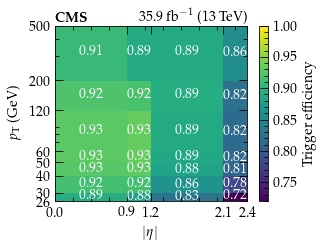

In [74]:
fig, ax = plt.subplots(figsize=(3.1, 2.325), dpi=100)

dftools.draw.cms_label(ax, "")
ax.set_xlabel(r'$|\eta|$')
ax.set_ylabel(r'$p_{\mathrm{T}}$ (GeV)')

ax.set_xlim(xbins.min(), xbins.max())
ax.set_ylim(ybins.min(), ybins.max())
ax.set_yscale('log')

hist, _, _, im = ax.hist2d(
    df["eta"], df["pt"],
    bins = (xbins, ybins),
    weights = df["eff"],
)

from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks(xbins)
ax.set_yticks(ybins)

for i in range(len(xbins)-1):
    for j in range(len(ybins)-1):
        ax.text(
            (xbins[i]+xbins[i+1])/2, np.sqrt(ybins[j]*ybins[j+1]),
            "{:.2f}".format(hist[i,j]),
            ha='center', va='center', color='white',
        )
        
im.set_clim(None, 1.)
cbar = fig.colorbar(im, ax=ax)
#cbar.set_label(r'$\mathtt{IsoMu24}\ ||\ \mathtt{IsoTkMu24}$ Efficiency Run2016B-F')
cbar.set_label(r'Trigger efficiency')
fig.savefig("muon_RunBCDEF_trigger_efficiency.pdf", format='pdf', bbox_inches='tight')

In [75]:
f = uproot.open("EfficienciesAndSF_Period4.root")
rhist = f["IsoMu24_OR_IsoTkMu24_PtEtaBins/efficienciesDATA/abseta_pt_DATA"]
hist, ((xbins, ybins),) = rhist.numpy()

index = pd.MultiIndex.from_product((xbins[:-1], ybins[:-1]), names=["eta", "pt"])
df = pd.DataFrame(
    {"eff": hist.ravel()}
).set_index(index).reset_index()
df.head(10)

,eta,pt,eff
0,0.0,26.0,0.900847
1,0.0,30.0,0.925353
2,0.0,40.0,0.937885
3,0.0,50.0,0.940786
4,0.0,60.0,0.943431
5,0.0,120.0,0.932522
6,0.0,200.0,0.922677
7,0.9,26.0,0.886678
8,0.9,30.0,0.924144
9,0.9,40.0,0.941101


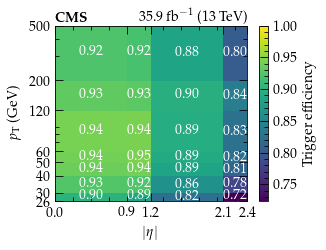

In [76]:
fig, ax = plt.subplots(figsize=(3.1, 2.325), dpi=100)

dftools.draw.cms_label(ax, "")
ax.set_xlabel(r'$|\eta|$')
ax.set_ylabel(r'$p_{\mathrm{T}}$ (GeV)')

ax.set_xlim(xbins.min(), xbins.max())
ax.set_ylim(ybins.min(), ybins.max())
ax.set_yscale('log')

hist, _, _, im = ax.hist2d(
    df["eta"], df["pt"],
    bins = (xbins, ybins),
    weights = df["eff"],
)

from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks(xbins)
ax.set_yticks(ybins)

for i in range(len(xbins)-1):
    for j in range(len(ybins)-1):
        ax.text(
            (xbins[i]+xbins[i+1])/2, np.sqrt(ybins[j]*ybins[j+1]),
            "{:.2f}".format(hist[i,j]),
            ha='center', va='center', color='white',
        )
        
im.set_clim(None, 1.)
cbar = fig.colorbar(im, ax=ax)
#cbar.set_label(r'$\mathtt{IsoMu24}\ ||\ \mathtt{IsoTkMu24}$ Efficiency Run2016G-H')
cbar.set_label(r'Trigger efficiency')
fig.savefig("muon_RunGH_trigger_efficiency.pdf", format='pdf', bbox_inches='tight')

In [77]:
f = uproot.open("EfficienciesAndSF_RunBtoF.root")
rhist = f["IsoMu24_OR_IsoTkMu24_PtEtaBins/abseta_pt_ratio"]
hist, ((xbins, ybins),) = rhist.numpy()

index = pd.MultiIndex.from_product((xbins[:-1], ybins[:-1]), names=["eta", "pt"])
df = pd.DataFrame(
    {"eff": hist.ravel()}
).set_index(index).reset_index()
df.head(10)

,eta,pt,eff
0,0.0,26.0,0.974930
1,0.0,30.0,0.978400
2,0.0,40.0,0.978602
3,0.0,50.0,0.979472
4,0.0,60.0,0.976239
5,0.0,120.0,0.971637
6,0.0,200.0,0.974591
7,0.9,26.0,0.951008
8,0.9,30.0,0.961095
9,0.9,40.0,0.962331


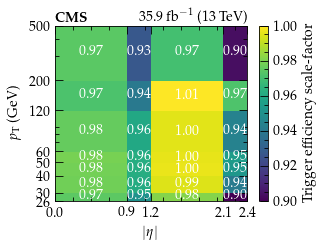

In [78]:
fig, ax = plt.subplots(figsize=(3.1, 2.325), dpi=100)

dftools.draw.cms_label(ax, "")
ax.set_xlabel(r'$|\eta|$')
ax.set_ylabel(r'$p_{\mathrm{T}}$ (GeV)')

ax.set_xlim(xbins.min(), xbins.max())
ax.set_ylim(ybins.min(), ybins.max())
ax.set_yscale('log')

hist, _, _, im = ax.hist2d(
    df["eta"], df["pt"],
    bins = (xbins, ybins),
    weights = df["eff"],
)

from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks(xbins)
ax.set_yticks(ybins)

for i in range(len(xbins)-1):
    for j in range(len(ybins)-1):
        ax.text(
            (xbins[i]+xbins[i+1])/2, np.sqrt(ybins[j]*ybins[j+1]),
            "{:.2f}".format(hist[i,j]),
            ha='center', va='center', color='white',
        )
        
im.set_clim(None, 1.)
cbar = fig.colorbar(im, ax=ax)
#cbar.set_label(r'$\mathtt{IsoMu24}\ ||\ \mathtt{IsoTkMu24}$ Efficiency Run2016B-F')
cbar.set_label(r'Trigger efficiency scale-factor')
fig.savefig("muon_RunBCDEF_trigger_scalefactors.pdf", format='pdf', bbox_inches='tight')

In [79]:
f = uproot.open("EfficienciesAndSF_Period4.root")
rhist = f["IsoMu24_OR_IsoTkMu24_PtEtaBins/abseta_pt_ratio"]
hist, ((xbins, ybins),) = rhist.numpy()

index = pd.MultiIndex.from_product((xbins[:-1], ybins[:-1]), names=["eta", "pt"])
df = pd.DataFrame(
    {"eff": hist.ravel()}
).set_index(index).reset_index()
df.head(10)

,eta,pt,eff
0,0.0,26.0,0.986981
1,0.0,30.0,0.991048
2,0.0,40.0,0.992596
3,0.0,50.0,0.992018
4,0.0,60.0,0.993243
5,0.0,120.0,0.981393
6,0.0,200.0,0.993894
7,0.9,26.0,0.962840
8,0.9,30.0,0.971896
9,0.9,40.0,0.974604


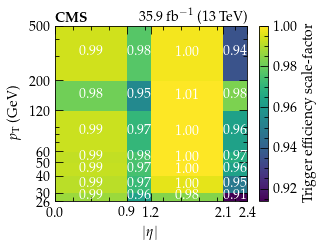

In [80]:
fig, ax = plt.subplots(figsize=(3.1, 2.325), dpi=100)

dftools.draw.cms_label(ax, "")
ax.set_xlabel(r'$|\eta|$')
ax.set_ylabel(r'$p_{\mathrm{T}}$ (GeV)')

ax.set_xlim(xbins.min(), xbins.max())
ax.set_ylim(ybins.min(), ybins.max())
ax.set_yscale('log')

hist, _, _, im = ax.hist2d(
    df["eta"], df["pt"],
    bins = (xbins, ybins),
    weights = df["eff"],
)

from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks(xbins)
ax.set_yticks(ybins)

for i in range(len(xbins)-1):
    for j in range(len(ybins)-1):
        ax.text(
            (xbins[i]+xbins[i+1])/2, np.sqrt(ybins[j]*ybins[j+1]),
            "{:.2f}".format(hist[i,j]),
            ha='center', va='center', color='white',
        )
        
im.set_clim(None, 1.)
cbar = fig.colorbar(im, ax=ax)
#cbar.set_label(r'$\mathtt{IsoMu24}\ ||\ \mathtt{IsoTkMu24}$ Efficiency Run2016B-F')
cbar.set_label(r'Trigger efficiency scale-factor')
fig.savefig("muon_RunGH_trigger_scalefactors.pdf", format='pdf', bbox_inches='tight')